<a href="https://colab.research.google.com/github/gohjx8808/age-gender-emotion-prediction/blob/main/age_gender_emotion_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install mtcnn matplotlib opencv-python

     |████████████████████████████████| 2.3MB 7.0MB/s 


# **Code starts here**

In [18]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import mtcnn
import glob
import matplotlib.pyplot as plt
import os
import cv2

In [3]:
targetFacesPath='gdrive/My Drive/age-gender-emotion-prediction/UTKface_inthewild'

In [19]:
def draw_facebox(filePath,result_list):
  # load the image
  data = plt.imread(filePath)
  # plot the image
  plt.imshow(data)
  # get the context for drawing boxes
  ax = plt.gca()
  # plot each box
  fileName=os.path.basename(filePath)
  for result in result_list:
    # get coordinates
    x, y, width, height = result['box']
    absX=max(0,x)
    absY=max(0,y)
    croppedFace=image[absY:y+height,absX:x+width]
    plt.imsave('gdrive/My Drive/age-gender-emotion-prediction/Age_gender_race_cropped/'+fileName, croppedFace)
    # create the shape
    rect = plt.Rectangle((x, y), width, height, fill=False, color='red')
    # draw the box
    ax.add_patch(rect)
    # show the plot
    plt.show()

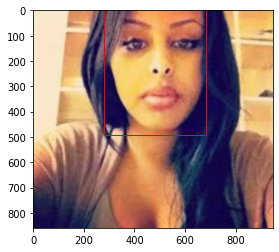

In [20]:
for filename in os.listdir(targetFacesPath):
  filePath=os.path.join(targetFacesPath,filename)
  image = plt.imread(filePath)
  detector = mtcnn.MTCNN()
  faces = detector.detect_faces(image)
  draw_facebox(filePath,faces)
  break